In [1]:
import phoebe
import numpy as np
phoebe.multiprocessing_off()
import matplotlib.pyplot as plt
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
%matplotlib inline
from phoebe.dependencies import crimpl

In [2]:
plt.rc('font', family='serif', size=18, serif='STIXGeneral')
plt.rc('mathtext', fontset='stix')

In [3]:
b = phoebe.load('./bundles/after_gps.bundle')

Make the zeropoint of the system the same as the zeropoint of super conjunction so that PHOEBE doesn't complain

In [4]:
print(b['t0_supconj'])
print(b['t0@system'])
b['t0@system']=b.get_value('t0_supconj')

Parameter: t0_supconj@binary@component
                       Qualifier: t0_supconj
                     Description: Zeropoint date at superior conjunction of the primary component
                           Value: 56243.167365301924 d
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, compute_phases@lc01@dataset, compute_times@rv01@dataset
                      Related to: period@binary@component, ecc@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, compute_times@lc01@dataset, phases_period@lc01@dataset, period_anom@binary@component, phases_dpdt@lc01@dataset, phases_t0@lc01@dataset, compute_phases@lc01@dataset, compute_phases@rv01@dataset, phases_period@rv01@dataset, phases_dpdt@rv01@dataset, phases_t0@rv01@dataset, compute_times@rv01@dataset

Parameter: t0@system
                       Qualifier: t0
         

In [5]:
print(b['per0'],b['esinw'],b['ecosw'],b['ecc'])

Parameter: per0@binary@component
                       Qualifier: per0
                     Description: Argument of periastron (defined at time t0@system)
                           Value: 169.87793393793999 deg
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component
                      Related to: t0_supconj@binary@component, period@binary@component, ecc@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component
 ParameterSet: 2 parameters
C          esinw@binary@component: 0.044924797736586225
                 esinw@constraint: {ecc@binary@component} * (sin({per0@binary@component})) ParameterSet: 2 parameters
C          ecosw@binary@component: -0.2516449959145911
                 ecosw@constraint: {ecc@binary@component} * (cos({per0@binary@component})

Now set the value for the noise nuisance parameter, sigma_lnf (the natural log of f). 
suggested sigma_lnf = -10:1 (also for rvs) as used by DFM in example of straight line.
total_sigma = sigma_0 + y^2 * e^(2*sigma_lnf) 

It is an additional factor that contributes to the per-point uncertainty and is a multiple of the flux.

In [6]:
b['sigmas_lnf@lc01']=-8.
#b['sigmas_lnf@rv01@primary']=-8.
#b['sigmas_lnf@rv01@secondary']=-8.

Because the current implementation of PHOEBE has a bug, we will multiply the radial velocities of the red giant by 10. The resulting uncertainties are ~200/300 m/s, which is more reasonable than 20/30 m/s. 

In [7]:
rv_sig = b.get_value('sigmas@secondary@rv01@dataset')
b.set_value('sigmas@secondary@rv01@dataset',rv_sig*10)
print(rv_sig, b['sigmas@secondary@rv01@dataset'])

[0.02 0.02 0.03 0.02 0.03 0.05 0.02 0.03 0.02 0.02 0.03 0.02 0.02 0.04
 0.02 0.02 0.02 0.03 0.03 0.02 0.02 0.03] Parameter: sigmas@secondary@rv01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on rv
                           Value: [0.2 0.2 0.3 ... 0.2 0.2 0.3] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: times:<notempty>



In [8]:
b.flip_constraint('requivsumfrac@binary', solve_for='requiv@primary')
b.flip_constraint('requivratio', solve_for='requiv@secondary')

<ConstraintParameter: {requiv@secondary@component} = (({requivratio@binary@component} * {requivsumfrac@binary@component}) * {sma@binary@component}) / ({requivratio@binary@component} + 1.000000) (solar units) => 7.5139255122126105 solRad>

Now flip the eccentricity and argument of periastron so that esinw and ecosw are fitted, instead. We select these parameters as they can be directly determined from the eclipse widths and separations of the eclipses.

In [9]:
b.flip_constraint('esinw', solve_for='ecc')
b.flip_constraint('ecosw', solve_for='per0')


<ConstraintParameter: {per0@binary@component} = arctan2({esinw@binary@component}, {ecosw@binary@component}) (solar units) => 169.87793393793999 deg>

In [10]:
b.enable_dataset('rv01')

<ParameterSet: 24 parameters | components: binary, secondary, primary>

In [11]:
b.flip_constraint('compute_times@rv01', solve_for='compute_phases')

<ConstraintParameter: {compute_phases@rv01@dataset} = times_to_phases({compute_times@rv01@dataset}, {phases_period@rv01@dataset}, {period@binary@component}, {period_anom@binary@component}, {phases_dpdt@rv01@dataset}, {dpdt@binary@component}, {phases_t0@rv01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component}) (solar units) => [-0.5        -0.49749373 -0.49498747 -0.4924812  -0.48997494 -0.48746867
 -0.48496241 -0.48245614 -0.47994987 -0.47744361 -0.47493734 -0.47243108
 -0.46992481 -0.46741855 -0.46491228 -0.46240602 -0.45989975 -0.45739348
 -0.45488722 -0.45238095 -0.44987469 -0.44736842 -0.44486216 -0.44235589
 -0.43984962 -0.43734336 -0.43483709 -0.43233083 -0.42982456 -0.4273183
 -0.42481203 -0.42230576 -0.4197995  -0.41729323 -0.41478697 -0.4122807
 -0.40977444 -0.40726817 -0.4047619  -0.40225564 -0.39974937 -0.39724311
 -0.39473684 -0.39223058 -0.38972431 -0.38721805 -0.38471178 -0.38220551
 -0.37969925 -0.37719298 -0.37468672 -0.3721

In [12]:
rv_times = b.get_value('times@secondary@rv01@dataset')
print(rv_times)

[56090.8962 56105.762  56165.7746 56165.9388 56166.8804 56173.9038
 56402.856  56424.8649 56444.9079 56456.9504 56537.6859 56544.6113
 56570.7522 56598.6598 56769.9847 56823.924  56944.6517 56946.5453
 56954.5395 56958.6213 56959.689  56962.5366]


In [13]:
b.set_value('compute_times@rv01', np.linspace(rv_times[0],rv_times[-1],501))

Set the third light so that it is a fraction of the total light (rather than in passband flux units).

In [14]:
b.set_value('l3_mode', 'fraction')
print(b.filter(qualifier='l3*'))

ParameterSet: 2 parameters
             l3_mode@lc01@dataset: fraction
             l3_frac@lc01@dataset: 0.0


In [15]:
teff_val   = b['teff@secondary@star@component'].get_value() 
incl_val   = b['incl@binary@orbit@component'].get_value() 
per0_val   = b['per0@binary@orbit@component'].get_value() 
asini_val  = b['asini@binary@orbit@component'].get_value() 
rho_val    = b['feature@rho@gp_celerite201'].get_value()
tau_val    = b['feature@tau@gp_celerite201'].get_value()
sigma_val  = b['feature@sigma@gp_celerite201'].get_value() 
esinw_val   = b['esinw@binary@orbit@component'].get_value() 
ecosw_val   = b['ecosw@binary@orbit@component'].get_value() 
ecc_val   = b['ecc@binary@orbit@component'].get_value() 
per0_val   = b['per0@binary@orbit@component'].get_value() 
sma_val  = b['sma@binary@orbit@component'].get_value() 

In [16]:
b.add_distribution('incl@binary', phoebe.uniform(incl_val-0.05,incl_val+0.05), distribution='init_sample',overwrite_all=True)
b.add_distribution('requivsumfrac', phoebe.gaussian_around(0.01), distribution='init_sample')
b.add_distribution('requivratio', phoebe.gaussian_around(0.01), distribution='init_sample')
b.add_distribution('teff@secondary', phoebe.gaussian_around(20), distribution='init_sample')
b.add_distribution('teffratio', phoebe.gaussian_around(0.02), distribution='init_sample')
b.add_distribution('pblum@secondary', phoebe.gaussian_around(0.01), distribution='init_sample')

b.add_distribution('ecosw', phoebe.uniform_around(0.01), distribution='init_sample')
b.add_distribution('esinw', phoebe.uniform_around(0.01), distribution='init_sample')
b.add_distribution('q', phoebe.gaussian_around(0.02), distribution='init_sample')
b.add_distribution('asini@binary', phoebe.gaussian_around(0.1), distribution='init_sample')
b.add_distribution('vgamma@system', phoebe.gaussian_around(0.5), distribution='init_sample')


b.add_distribution('l3_frac', phoebe.uniform(0,0.01), distribution='init_sample')
b.add_distribution('gravb_bol@primary', phoebe.uniform(0.31,0.35), distribution='init_sample')
b.add_distribution('gravb_bol@secondary', phoebe.uniform(0.31,0.35), distribution='init_sample')

b.add_distribution('rho@gp_celerite201', phoebe.uniform(rho_val-rho_val*0.01,rho_val+rho_val*0.01), distribution='init_sample')
b.add_distribution('tau@gp_celerite201', phoebe.uniform(tau_val-tau_val*0.01,tau_val+tau_val*0.01), distribution='init_sample')
b.add_distribution('sigma@gp_celerite201', phoebe.uniform(sigma_val-sigma_val*0.01,sigma_val+sigma_val*0.01), distribution='init_sample')
b.add_distribution('sigmas_lnf@lc01', phoebe.uniform(-9.,-7.), distribution='init_sample')
#b.add_distribution('sigmas_lnf@rv01@primary', phoebe.uniform(-9.,-7.), distribution='init_sample')
#b.add_distribution('sigmas_lnf@rv01@secondary', phoebe.uniform(-9.,-7.), distribution='init_sample')


<ParameterSet: 1 parameters>

In [ ]:
b.run_compute(compute='comp_phys', sample_from='init_sample',
              sample_num=10, model='init_from_model',overwrite=True)

In [ ]:
_ = b.plot(dataset='lc01', 
           marker={'dataset': '.'},xlim=(55730,55750),
           model='init_from_model', show=True)

In [ ]:
_ = b.plot(dataset='lc01', 
           marker={'dataset': '.'}, y='residuals',
           model='init_from_model', show=True)#55200, 55400

In [ ]:
_ = b.plot_distribution_collection('init_sample', show=True)

In [ ]:
print (b['init_sample'])

Store the current values of the parameters to use for priors. Do not use "gaussian around" or "uniform around" for the priors, as the distribution (hence mean) updates with iteration, casuing the range to move. 

Set the max and min values of the argument of periastron so that the components do not switch

In [17]:
if (ecosw_val < 0):
    ecosw_max = -0.0000001
    ecosw_min = -.5
else:
    ecosw_max = 0.5
    ecosw_min = 0.00000001


In [18]:
print(ecosw_min,ecosw_max)

-0.5 -1e-07


In [19]:
b.add_distribution('incl@binary', phoebe.uniform(83.,90), distribution='mypriors',overwrite_all=True)
b.add_distribution('asini@binary', phoebe.uniform(asini_val-7.,asini_val+7.), distribution='mypriors')
b.add_distribution('teff@secondary', phoebe.gaussian(teff_val,150.), distribution='mypriors')
b.add_distribution('ecosw', phoebe.uniform(ecosw_min,ecosw_max), distribution='mypriors')#To prevent the components switching.
b.add_distribution('ecc', phoebe.uniform(0,1.0,wrap_at=1.0), distribution='mypriors')#To prevent the components switching.


b.add_distribution('l3_frac', phoebe.uniform(0,0.1), distribution='mypriors')
b.add_distribution('gravb_bol@primary', phoebe.uniform(0.3,0.6), distribution='mypriors')
b.add_distribution('gravb_bol@secondary', phoebe.uniform(0.3,0.6), distribution='mypriors')

b.add_distribution('rho@gp_celerite201', phoebe.uniform(rho_val-rho_val*0.025,rho_val+rho_val*0.025), distribution='mypriors')
b.add_distribution('tau@gp_celerite201', phoebe.uniform(tau_val-tau_val*0.025,tau_val+tau_val*0.025), distribution='mypriors')
b.add_distribution('sigma@gp_celerite201', phoebe.uniform(sigma_val-sigma_val*0.025,sigma_val+sigma_val*0.025), distribution='mypriors')
                   
b.add_distribution('sigmas_lnf@lc01', phoebe.uniform(-10.,-5), distribution='mypriors')
#b.add_distribution('sigmas_lnf@rv01@primary', phoebe.uniform(-10.,-5.), distribution='mypriors')
#b.add_distribution('sigmas_lnf@rv01@secondary', phoebe.uniform(-10.,-5.), distribution='mypriors')

#b.add_distribution('requivsumfrac', phoebe.uniform_around(0.03), distribution='mypriors')
#b.add_distribution('requivratio', phoebe.uniform_around(2.), distribution='mypriors')
#b.add_distribution('teffratio', phoebe.uniform_around(0.2), distribution='mypriors')
#b.add_distribution('per0', phoebe.uniform(per0_min,per0_max), distribution='mypriors')#Include a prior on per0 as kept flipping orbits
#b.add_distribution('q', phoebe.uniform_around(0.2, wrap_at=1.), distribution='mypriors')


<ParameterSet: 1 parameters>

Add prior information here. This includes reasonable limits on inclination, given the fact that we see eclipses, temperature information from spectroscopy and limits on the gravity brightening factor (from theory). 
A prior on ecc is included because the negative esinw value causes the limits to go from high to low (which is why we need "wrap at").

There are also constraints on the gaussian process values as they have been calcuated from knowledge of the spot rotation duration.

In [20]:
print (b['mypriors'])

ParameterSet: 12 parameters
       incl@mypriors@distribution: <distl.uniform low=83.0 high=90.0 unit=deg>
      asini@mypriors@distribution: <distl.uniform low=79.24488713317912 high=93.24488713317912 unit=solRad>
       teff@mypriors@distribution: <distl.gaussian loc=5042.0 scale=150.0 unit=K>
      ecosw@mypriors@distribution: <distl.uniform low=-0.5 high=-1e-07 unit=>
        ecc@mypriors@distribution: <distl.uniform low=0.0 high=1.0 unit= wrap_at=1.0>
    l3_frac@mypriors@distribution: <distl.uniform low=0.0 high=0.1 unit=>
   gravb_bol@primary@mypriors@...: <distl.uniform low=0.3 high=0.6 unit=>
   gravb_bol@secondary@myprior...: <distl.uniform low=0.3 high=0.6 unit=>
        rho@mypriors@distribution: <distl.uniform low=70.9968688560402 high=74.63773392558072 unit=>
        tau@mypriors@distribution: <distl.uniform low=112.99502622485835 high=118.78964295433826 unit=>
      sigma@mypriors@distribution: <distl.uniform low=0.00020251736221520869 high=0.00021290286796983476 unit=>


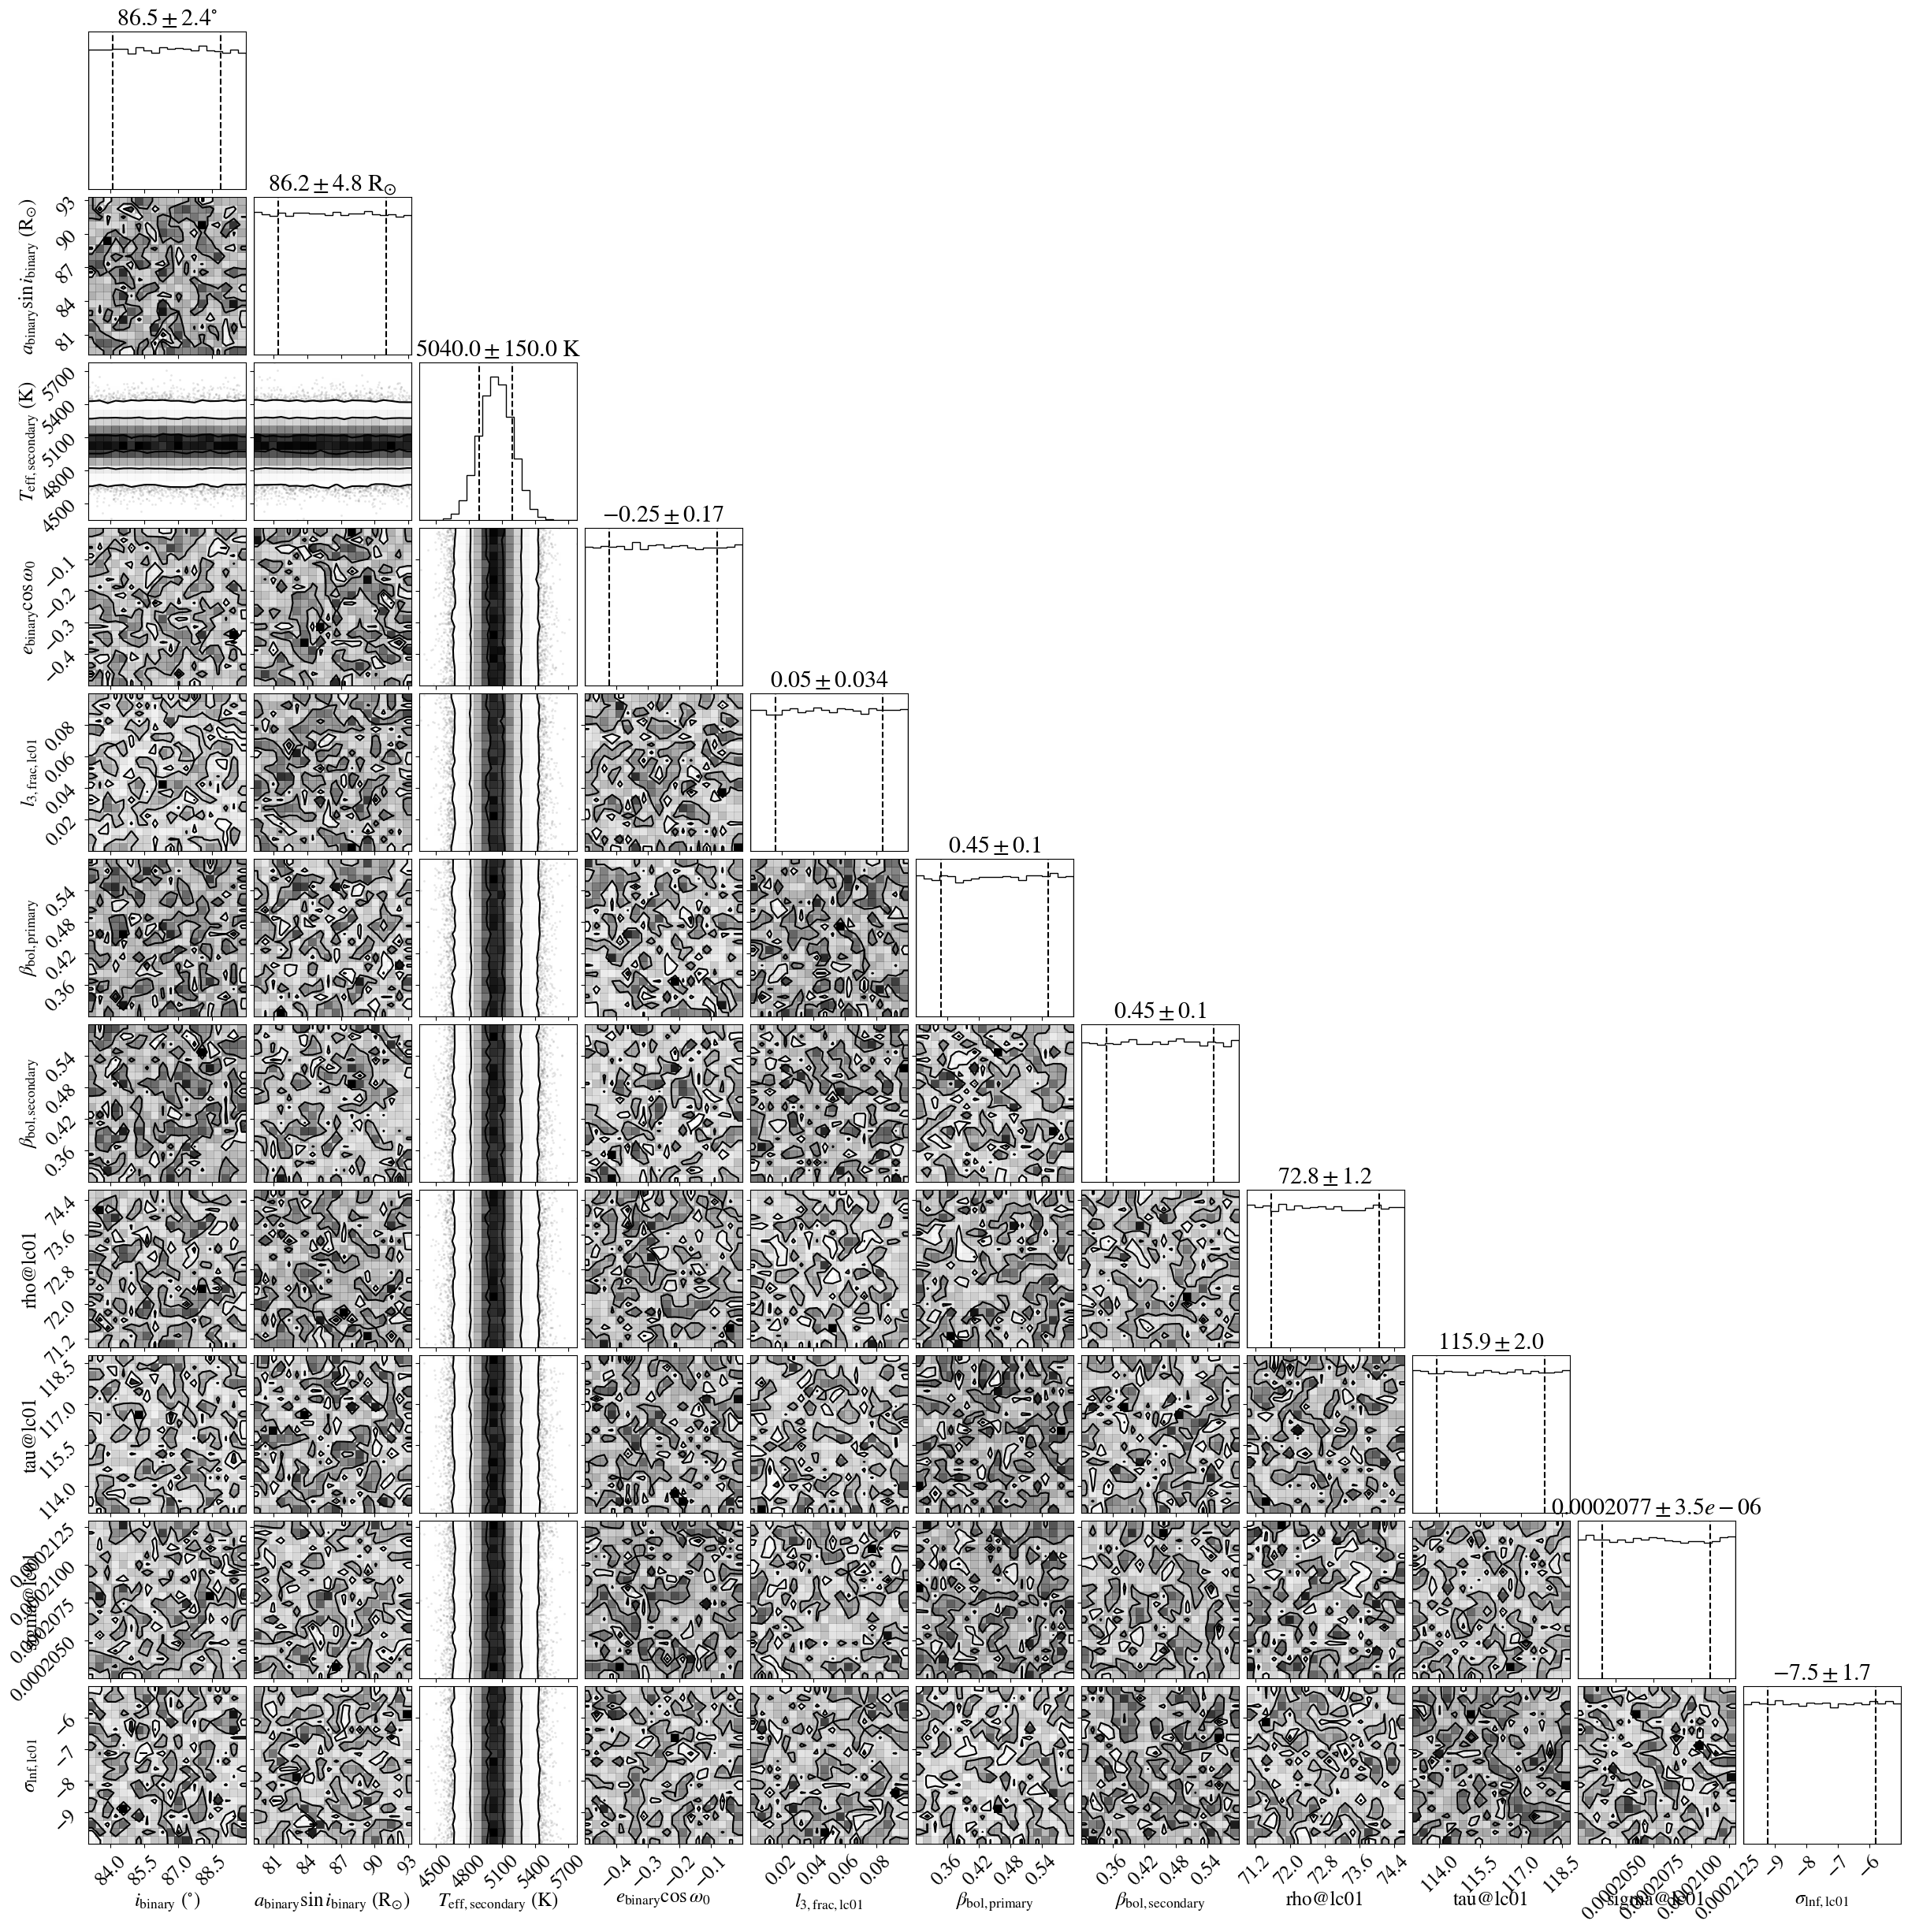

In [21]:
_ = b.plot_distribution_collection('mypriors', show=True)

In [22]:
print(b.filter(qualifier='enabled'))

ParameterSet: 12 parameters
    enabled@lc01@phoebe01@compute: True
    enabled@rv01@phoebe01@compute: True
      enabled@lc01@nm_fit@compute: True
      enabled@rv01@nm_fit@compute: True
   enabled@lc01@comp_phys@compute: True
   enabled@rv01@comp_phys@compute: True
   enabled@lc01@fastcompute@co...: True
   enabled@rv01@fastcompute@co...: True
   enabled@gp_celerite201@phoe...: True
   enabled@gp_celerite201@nm_f...: True
   enabled@gp_celerite201@comp...: True
   enabled@gp_celerite201@fast...: True


In [23]:
print (b['mypriors'])

ParameterSet: 12 parameters
       incl@mypriors@distribution: <distl.uniform low=83.0 high=90.0 unit=deg label=incl@binary label_latex=$i_\mathrm{ binary }$>
      asini@mypriors@distribution: <distl.uniform low=79.24488713317912 high=93.24488713317912 unit=solRad label=asini@binary label_latex=$a_\mathrm{ binary } \sin i_\mathrm{ binary }$>
       teff@mypriors@distribution: <distl.gaussian loc=5042.0 scale=150.0 unit=K label=teff@secondary label_latex=$T_{ \mathrm{ eff }, \mathrm{ secondary } }$>
      ecosw@mypriors@distribution: <distl.uniform low=-0.5 high=-1e-07 unit= label=ecosw@binary label_latex=$e_\mathrm{ binary } \cos \omega_0$>
        ecc@mypriors@distribution: <distl.uniform low=0.0 high=1.0 unit= wrap_at=1.0>
    l3_frac@mypriors@distribution: <distl.uniform low=0.0 high=0.1 unit= label=l3_frac@lc01 label_latex=$l_\mathrm{ 3, frac, lc01 }$>
   gravb_bol@primary@mypriors@...: <distl.uniform low=0.3 high=0.6 unit= label=gravb_bol@primary label_latex=$\beta_{ \mathrm{bol}

In [24]:
print (b['rho@gp_celerite201'])

ParameterSet: 3 parameters
       rho@gp_celerite201@feature: 72.81730139081046
     rho@init_sample@distribution: <distl.uniform low=72.08912837690235 high=73.54547440471856 unit=>
        rho@mypriors@distribution: <distl.uniform low=70.9968688560402 high=74.63773392558072 unit= label=rho@lc01>


In [25]:
b.add_solver('sampler.emcee', solver='mcmc_gps',
              init_from='init_sample',
              priors='mypriors', 
              compute='comp_phys', nwalkers=128, niters=10000, progress_every_niters=10,overwrite=True)

<ParameterSet: 17 parameters | qualifiers: compute, nwalkers, niters, continue_from, thin_factor, continue_from_iter, comments, use_server, priors, nlags_factor, priors_combine, progress_every_niters, init_from, expose_failed, init_from_requires, burnin_factor, init_from_combine>

In [26]:
print(b['mcmc_gps'])

ParameterSet: 15 parameters
         comments@mcmc_gps@solver: 
       use_server@mcmc_gps@solver: compute
          compute@mcmc_gps@solver: comp_phys
    continue_from@mcmc_gps@solver: None
        init_from@mcmc_gps@solver: ['init_sample']
   init_from_combine@mcmc_gps@...: first
   init_from_requires@mcmc_gps...: ['limits', 'priors']
           priors@mcmc_gps@solver: ['mypriors']
         nwalkers@mcmc_gps@solver: 128
           niters@mcmc_gps@solver: 10000
    burnin_factor@mcmc_gps@solver: 2.0
      thin_factor@mcmc_gps@solver: 0.0
     nlags_factor@mcmc_gps@solver: 3.0
   progress_every_niters@mcmc_...: 10
    expose_failed@mcmc_gps@solver: True


In [27]:
b.add_server('remoteslurm', crimpl_name='terra',
             use_conda=True, conda_env='my_phoebe_env',
             server='myserver',overwrite=True,nprocs=128)

<ParameterSet: 12 parameters | qualifiers: conda_env, addl_slurm_kwargs, walltime, use_conda, nprocs, install_deps, mail_user, isolate_env, use_mpi, mail_type, slurm_job_name, crimpl_name>

In [28]:
b.set_value('install_deps', False)
b.set_value('slurm_job_name', 'kic8430105_mcmc')
b.set_value('walltime', 48)

In [29]:
b.run_solver(solver='mcmc_gps', use_server='myserver', solution = 'mcmc_gps_sol_rverr_fixed', overwrite=True, progress_every_niters=10, detach=True)

# crimpl: ssh myserver "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh myserver "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh myserver "pwd"
# crimpl: ssh myserver "ls /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/*"
# crimpl: ssh myserver "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh myserver:~/crimpl/
# crimpl: ssh myserver "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh myserver "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh myserver "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh myserver "ls -d ~/crimpl/crimpl-job-kic8430105_mcmc/crimpl-envs/*"
# crimpl: ssh myserver "source ~/crimpl/exportpath.sh; mkdir -p /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32"
# crimpl: scp crimpl_submit_script.sh /Users/user/Stars/objects/rg/gaulme/8430105/_fOFtIYtvuksuLOgWdALKwaTtgilGwk.py myserver:/home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/
# crimpl: ssh myserver "source ~/crimpl/exportpath.sh; echo '_fOFtIYtvuksuLOgWdALKwaTtgilGwk.py' >> /home/users

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [ ]:
b.get_job_status(solution='mcmc_gps_sol_rverr_fixed')

In [32]:
b.save('bundles/running_job_mcmc_gps.bundle')

'bundles/running_job_mcmc_gps.bundle'

In [33]:
b.load_job_progress(solution='mcmc_gps_sol_rverr_fixed')

# crimpl: ssh myserver "ls /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/*"
# crimpl: ssh myserver "ls /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/*"
# crimpl: ssh myserver "ls /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/*"
# crimpl: ssh myserver "cat /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/crimpl-input-files.list"
# crimpl: ssh myserver "ls /home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/*"
# crimpl: scp myserver:/home/users/kelly/crimpl/crimpl-job-2024.03.14-13.55.32/slurm-10127.out ./
# crimpl: ssh myserver "squeue -j 10127"


ValueError: job has not yet produced any output, with the following log:

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.

PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.

PHOEBE: passband "Kepler:mean" has a newer version available.  Run phoebe.list_passband_online_history("Kepler:mean") to get a list of available changes and phoebe.update_passband("Kepler:mean") or phoebe.update_all_passbands() to update.

PHOEBE: passband "TESS:T" has a newer version available.  Run phoebe.list_passband_online_history("TESS:T") to get a list of available changes and phoebe.update_passband("TESS:T") or phoebe.update_all_passbands() to update.



  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:08<18:44,  8.85s/it]

  2%|▏         | 2/128 [00:09<08:41,  4.14s/it]

  2%|▏         | 3/128 [00:10<05:33,  2.67s/it]

  5%|▍         | 6/128 [00:10<01:59,  1.03it/s]

  5%|▌         | 7/128 [00:11<01:39,  1.22it/s]

  7%|▋         | 9/128 [00:12<01:29,  1.34it/s]

 11%|█         | 14/128 [00:13<00:41,  2.76it/s]

 13%|█▎        | 17/128 [00:14<00:50,  2.21it/s]

 19%|█▉        | 24/128 [00:15<00:24,  4.26it/s]

 20%|██        | 26/128 [00:16<00:32,  3.12it/s]

 23%|██▎       | 30/128 [00:19<00:40,  2.43it/s]

 32%|███▏      | 41/128 [00:19<00:16,  5.22it/s]

 34%|███▎      | 43/128 [00:20<00:19,  4.46it/s]

 35%|███▌      | 45/128 [00:20<00:16,  4.95it/s]

 37%|███▋      | 47/128 [00:22<00:29,  2.72it/s]

 42%|████▏     | 54/128 [00:23<00:19,  3.85it/s]

 45%|████▌     | 58/128 [00:24<00:17,  4.05it/s]

 49%|████▉     | 63/128 [00:25<00:15,  4.16it/s]

 55%|█████▌    | 71/128 [00:26<00:10,  5.48it/s]

 57%|█████▋    | 73/128 [00:27<00:12,  4.27it/s]

 62%|██████▎   | 80/128 [00:27<00:07,  6.00it/s]

 64%|██████▍   | 82/128 [00:28<00:07,  6.19it/s]

 65%|██████▍   | 83/128 [00:28<00:08,  5.47it/s]

 66%|██████▌   | 84/128 [00:29<00:09,  4.60it/s]

 68%|██████▊   | 87/128 [00:29<00:09,  4.21it/s]

 72%|███████▏  | 92/128 [00:31<00:10,  3.60it/s]

 77%|███████▋  | 99/128 [00:32<00:06,  4.68it/s]

 78%|███████▊  | 100/128 [00:33<00:06,  4.16it/s]

 80%|███████▉  | 102/128 [00:34<00:07,  3.51it/s]

 80%|████████  | 103/128 [00:36<00:14,  1.68it/s]

 86%|████████▌ | 110/128 [00:36<00:04,  3.66it/s]

 88%|████████▊ | 113/128 [00:37<00:04,  3.75it/s]

 95%|█████████▍| 121/128 [00:38<00:01,  5.58it/s]

 96%|█████████▌| 123/128 [00:39<00:01,  4.33it/s]

 98%|█████████▊| 126/128 [00:39<00:00,  4.90it/s]

100%|██████████| 128/128 [00:39<00:00,  3.22it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [09:41<1614:06:15, 581.14s/it]

  0%|          | 2/10000 [19:21<1612:39:56, 580.68s/it]

  0%|          | 3/10000 [29:05<1616:33:42, 582.14s/it]

  0%|          | 4/10000 [38:45<1614:20:42, 581.40s/it]

  0%|          | 5/10000 [48:22<1609:54:33, 579.86s/it]

  0%|          | 6/10000 [58:02<1609:55:38, 579.92s/it]

  0%|          | 7/10000 [1:07:36<1603:41:31, 577.73s/it]

In [ ]:
#b.kill_job(solution='mcmc_gps_sol')